---EDA on order_info.csv---

In [1]:
#loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading data
df = pd.read_csv("order_info.csv")

#basic data information
print("\n\n\n---First 5 Rows---")
print(df.head())

print("\n\n\n---DataFrame Info---")
df.info()

print("\n\n\n---Descriptive Statistics---")
print(df.describe(include='all'))




---First 5 Rows---
   Order ID Customer ID Warehouse ID  Customer Age Customer Gender        Date
0         1     CUST966        WH004            65          Female  2023-03-04
1         2     CUST952        WH003            31          Female  2023-04-04
2         3     CUST987        WH001            25          Female  2023-02-07
3         4     CUST524        WH001            56            Male  2023-03-22
4         5     CUST415        WH002            59            Male  2023-11-11



---DataFrame Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Order ID         10000 non-null  int64 
 1   Customer ID      10000 non-null  object
 2   Warehouse ID     10000 non-null  object
 3   Customer Age     10000 non-null  int64 
 4   Customer Gender  10000 non-null  object
 5   Date             10000 non-null  object
dtypes: int64

In [2]:
#data cleaning
#convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])
print("\n\n\n---Data Types After Date Conversion---")
print(df.dtypes)

#check for duplicate rows
print(f"\nNumber of duplicate rows before removal: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

print("\n---- Data cleaning completed ----")




---Data Types After Date Conversion---
Order ID                    int64
Customer ID                object
Warehouse ID               object
Customer Age                int64
Customer Gender            object
Date               datetime64[ns]
dtype: object

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0

---- Data cleaning completed ----


In [3]:
#feature engineering
#extract month and day of the week from 'Date'
df['Order Month'] = df['Date'].dt.month_name()
df['Order Day of Week'] = df['Date'].dt.day_name()

print("---- DataFrame with New Features (First 5 Rows) ----")
print(df.head())

print("\n---- Value Counts for New Features ----")
print("Order Month Counts:")
print(df['Order Month'].value_counts())
print("\nOrder Day of Week Counts:")
print(df['Order Day of Week'].value_counts())

print("\n---- Feature engineering completed ----")

---- DataFrame with New Features (First 5 Rows) ----
   Order ID Customer ID Warehouse ID  Customer Age Customer Gender       Date  \
0         1     CUST966        WH004            65          Female 2023-03-04   
1         2     CUST952        WH003            31          Female 2023-04-04   
2         3     CUST987        WH001            25          Female 2023-02-07   
3         4     CUST524        WH001            56            Male 2023-03-22   
4         5     CUST415        WH002            59            Male 2023-11-11   

  Order Month Order Day of Week  
0       March          Saturday  
1       April           Tuesday  
2    February           Tuesday  
3       March         Wednesday  
4    November          Saturday  

---- Value Counts for New Features ----
Order Month Counts:
Order Month
June         891
May          875
November     866
July         865
March        852
January      844
December     834
October      825
September    820
August       807
April        

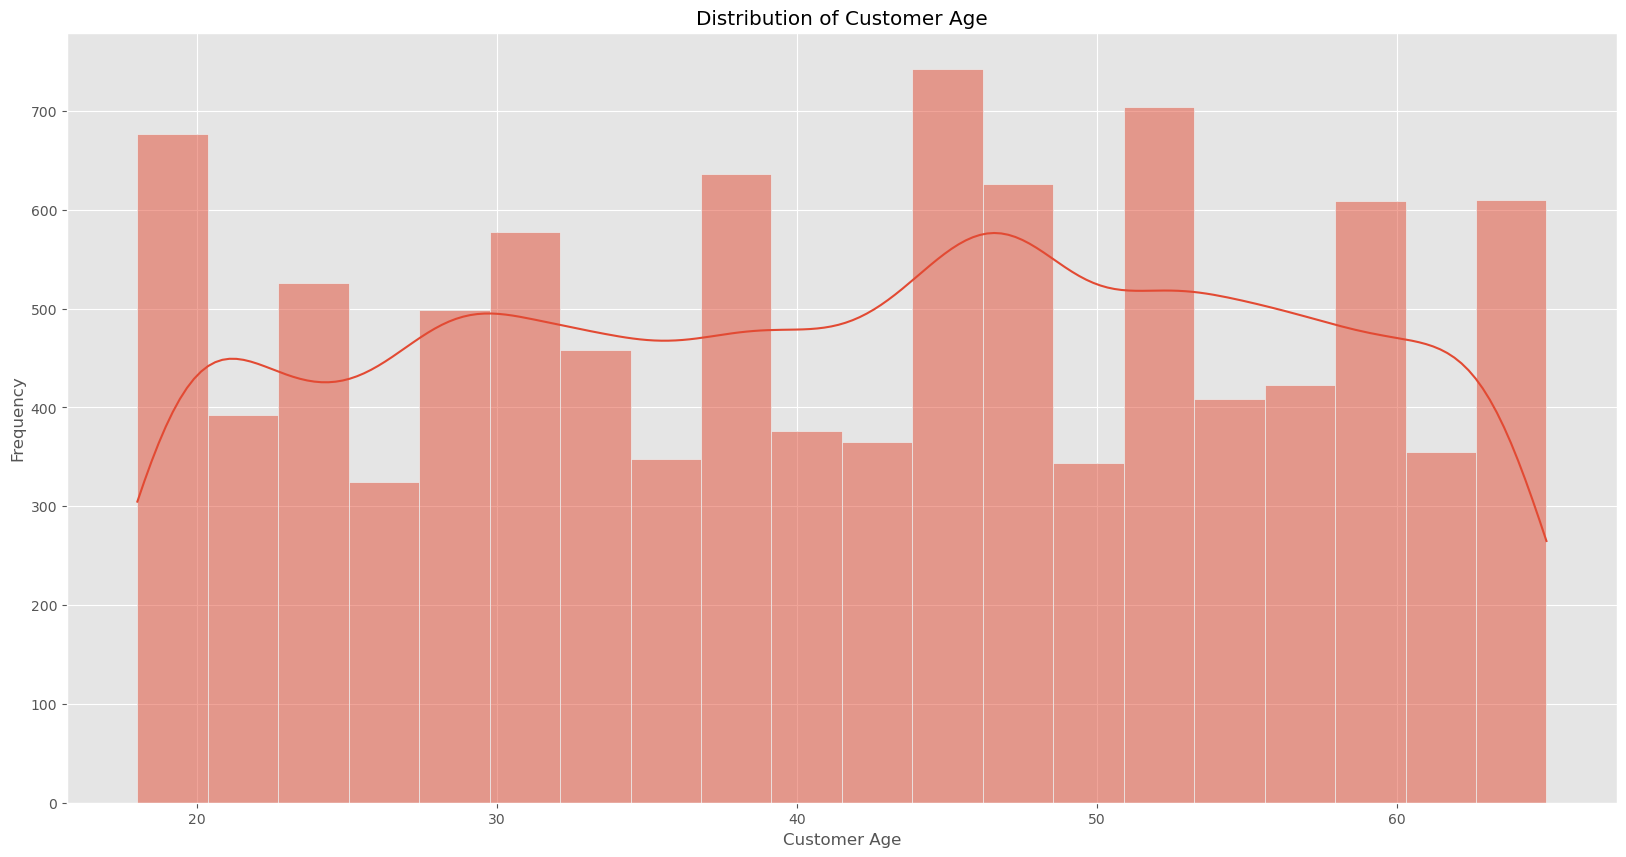

In [4]:
#Univariate analysis - Customer Age
plt.style.use('ggplot') 

# Histogram for 'Customer Age'
plt.figure(figsize=(20,10))
sns.histplot(df['Customer Age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

Plot 1: Histogram of Customer Age

Observations:  
The distribution of customer age is relatively uniform across the range from 20s-40s then peaking between 40s-50s and a drastic fall-off after 60.

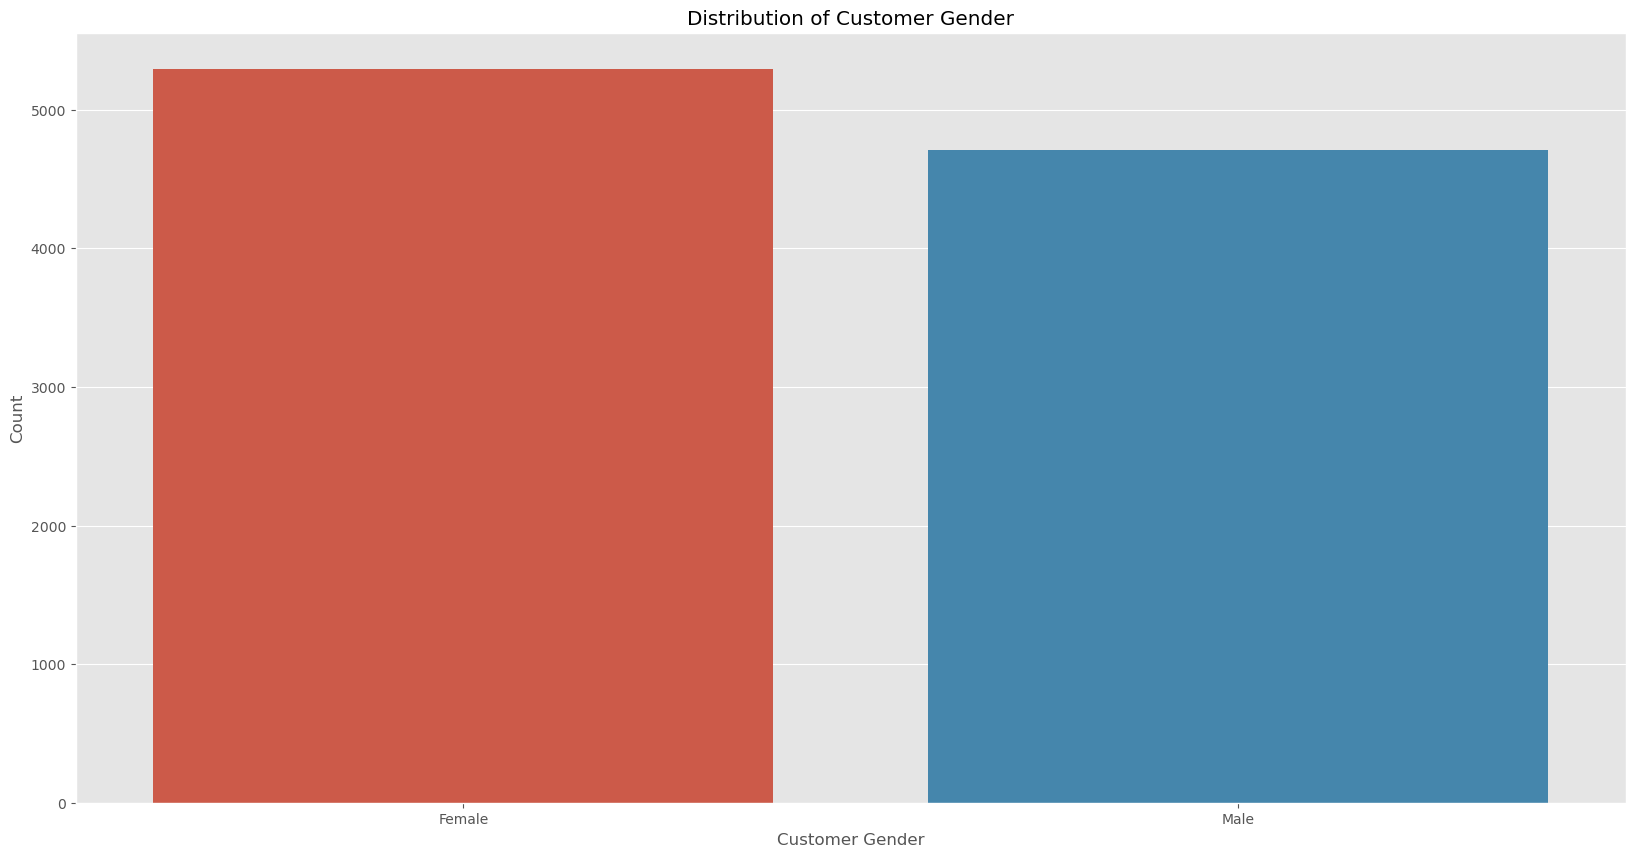

In [5]:
#Univariate analysis - Customer Gender
plt.style.use('ggplot')

# Count plot for 'Customer Gender'
plt.figure(figsize=(20,10))
sns.countplot(x='Customer Gender', data=df, hue='Customer Gender', legend=False)
plt.title('Distribution of Customer Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Count')
plt.show()

Plot 2: Count plot of Customer Gender

Observations:  
The dataset contains slightly more female customers than male customers.

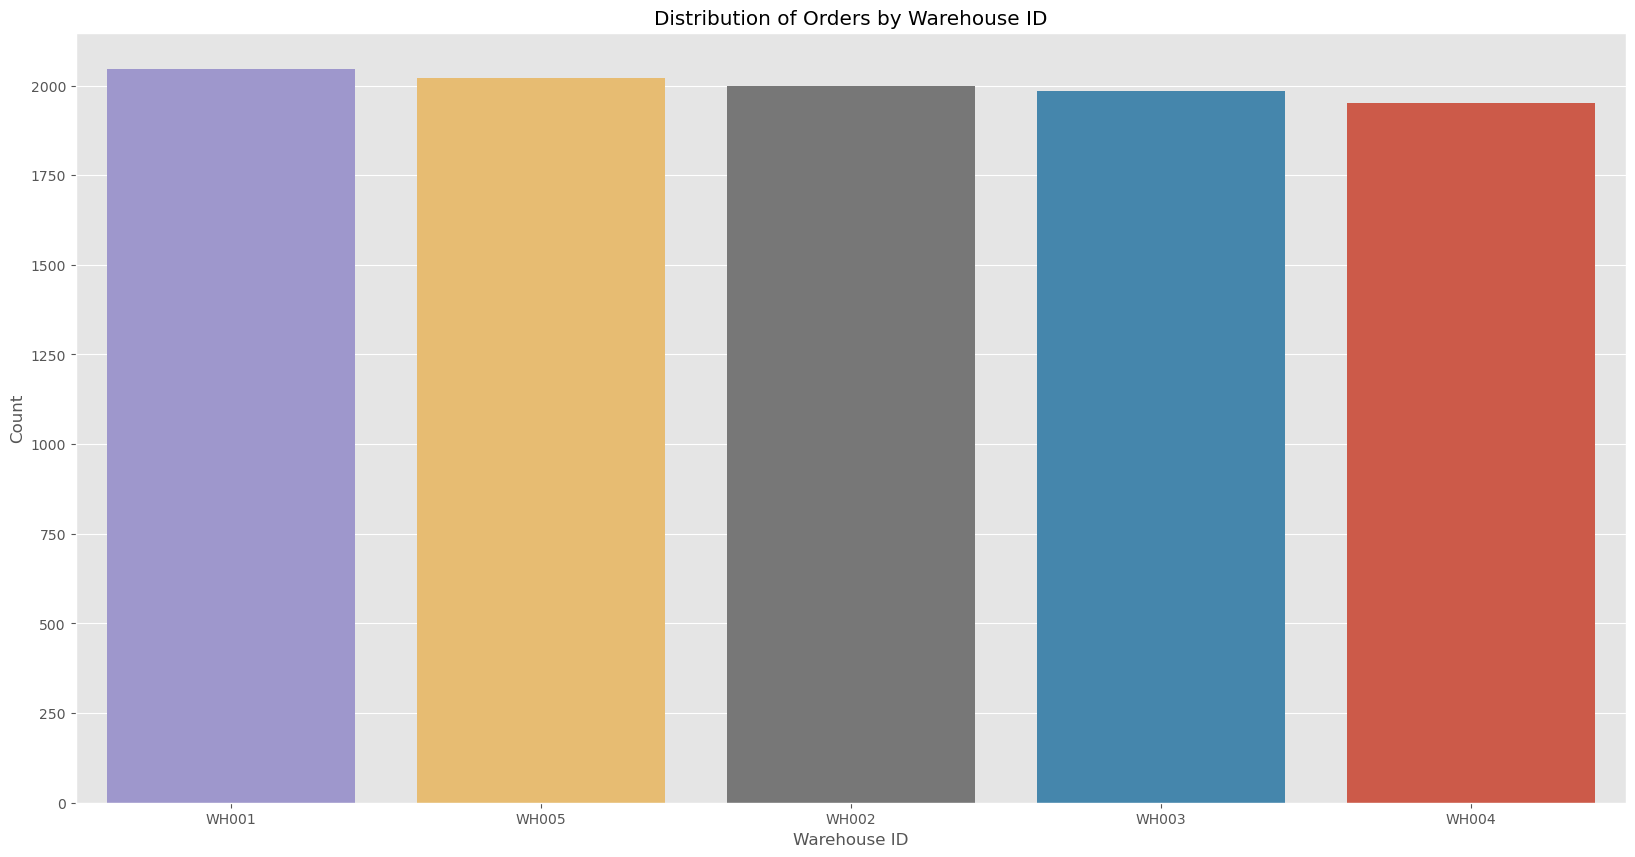

In [6]:
#Univariate analysis - Warehouse ID
plt.style.use('ggplot')

# Count plot for 'Warehouse ID'
plt.figure(figsize=(20,10)) # Adjusted figure size
sns.countplot(x='Warehouse ID', data=df, order=df['Warehouse ID'].value_counts().index, hue='Warehouse ID', legend=False)
plt.title('Distribution of Orders by Warehouse ID')
plt.xlabel('Warehouse ID')
plt.ylabel('Count')
plt.show()

Plot 3: Count plot of Warehouse ID

Observations:  
Warehouse WH001 handles the highest number of orders, followed by WH005, WH002, WH003, and WH004 respectively.  
The number of orders are stable across all warehouses.

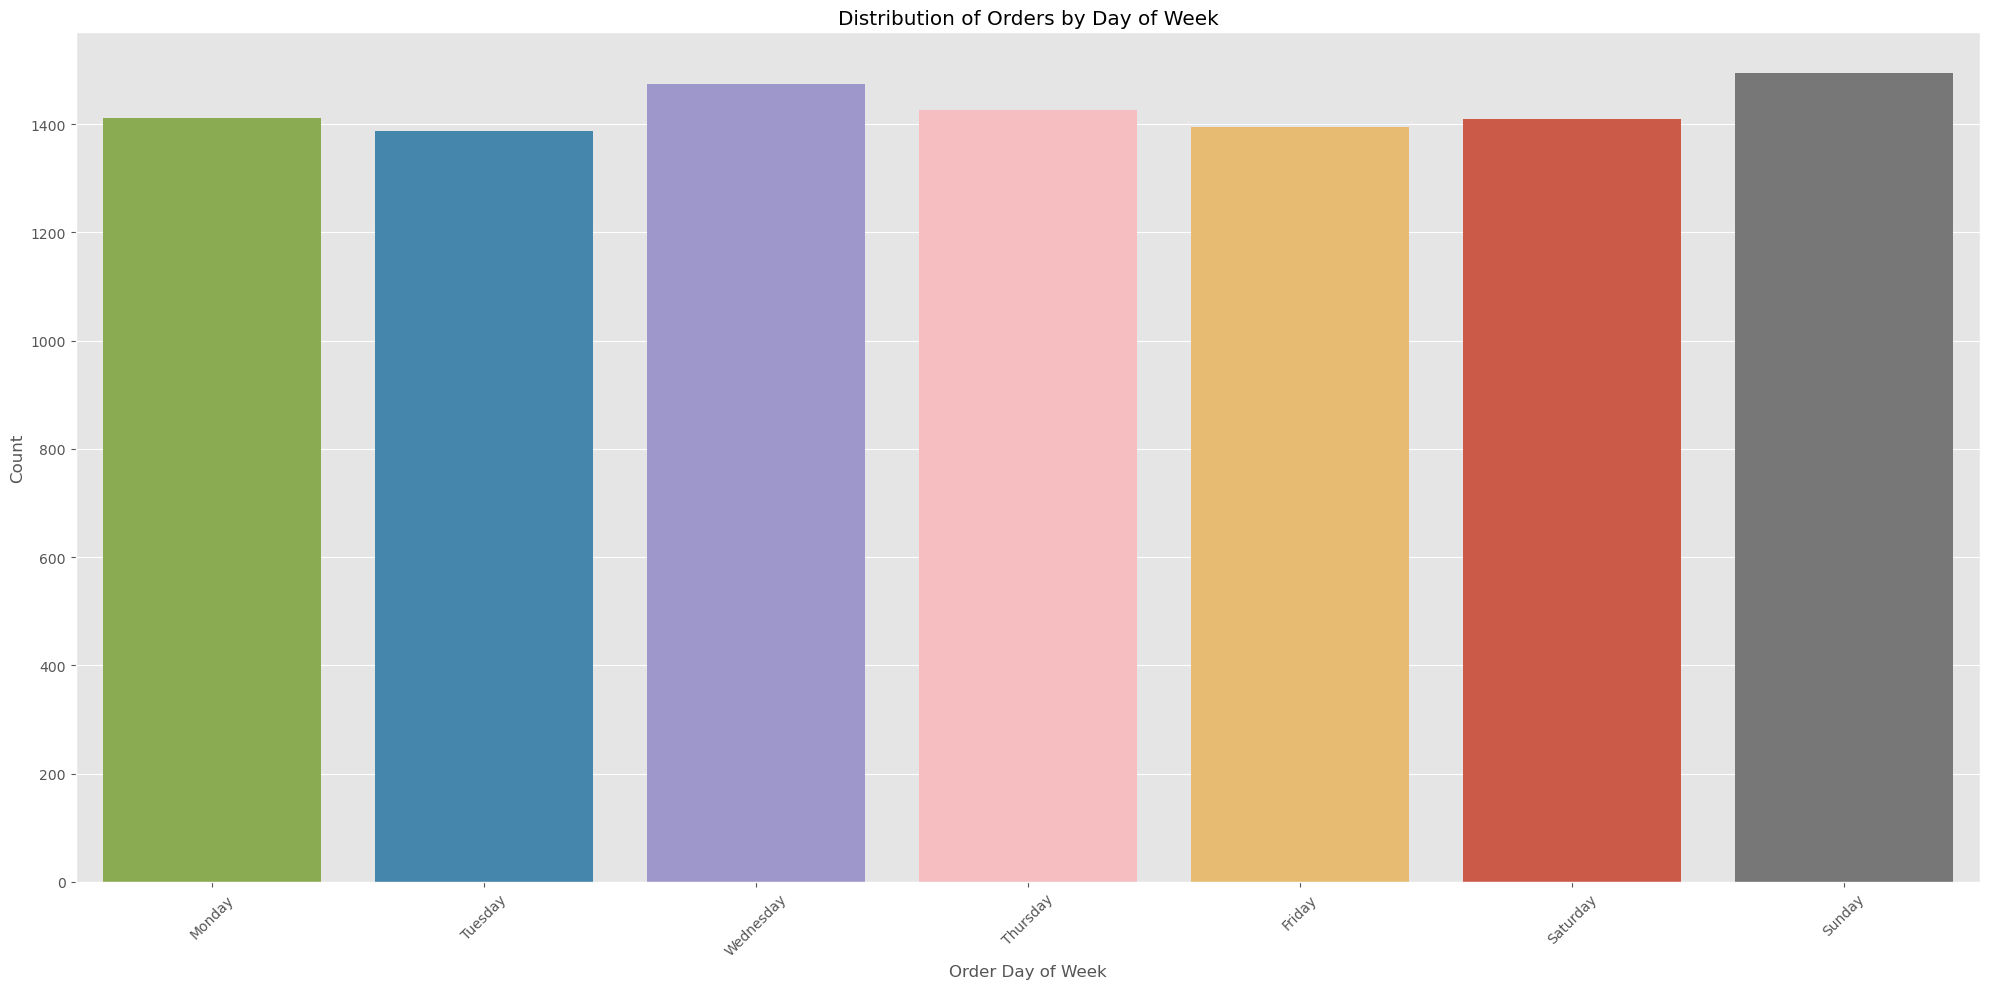

In [7]:
#Univariate analysis - Order Day of Week
plt.style.use('ggplot')

# Count plot for 'Order Day of Week'
plt.figure(figsize=(20,10)) # Adjusted figure size
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='Order Day of Week', data=df, order=day_order, hue= 'Order Day of Week', legend=False)
plt.title('Distribution of Orders by Day of Week')
plt.xlabel('Order Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Plot 4: Count plot of Order Day of Week

Observations:  
The number of orders is fairly consistent across all days of the week.  
Sunday has a slightly higher number of orders, while Tuesday and Friday have slightly fewer, but the differences are not substantial.

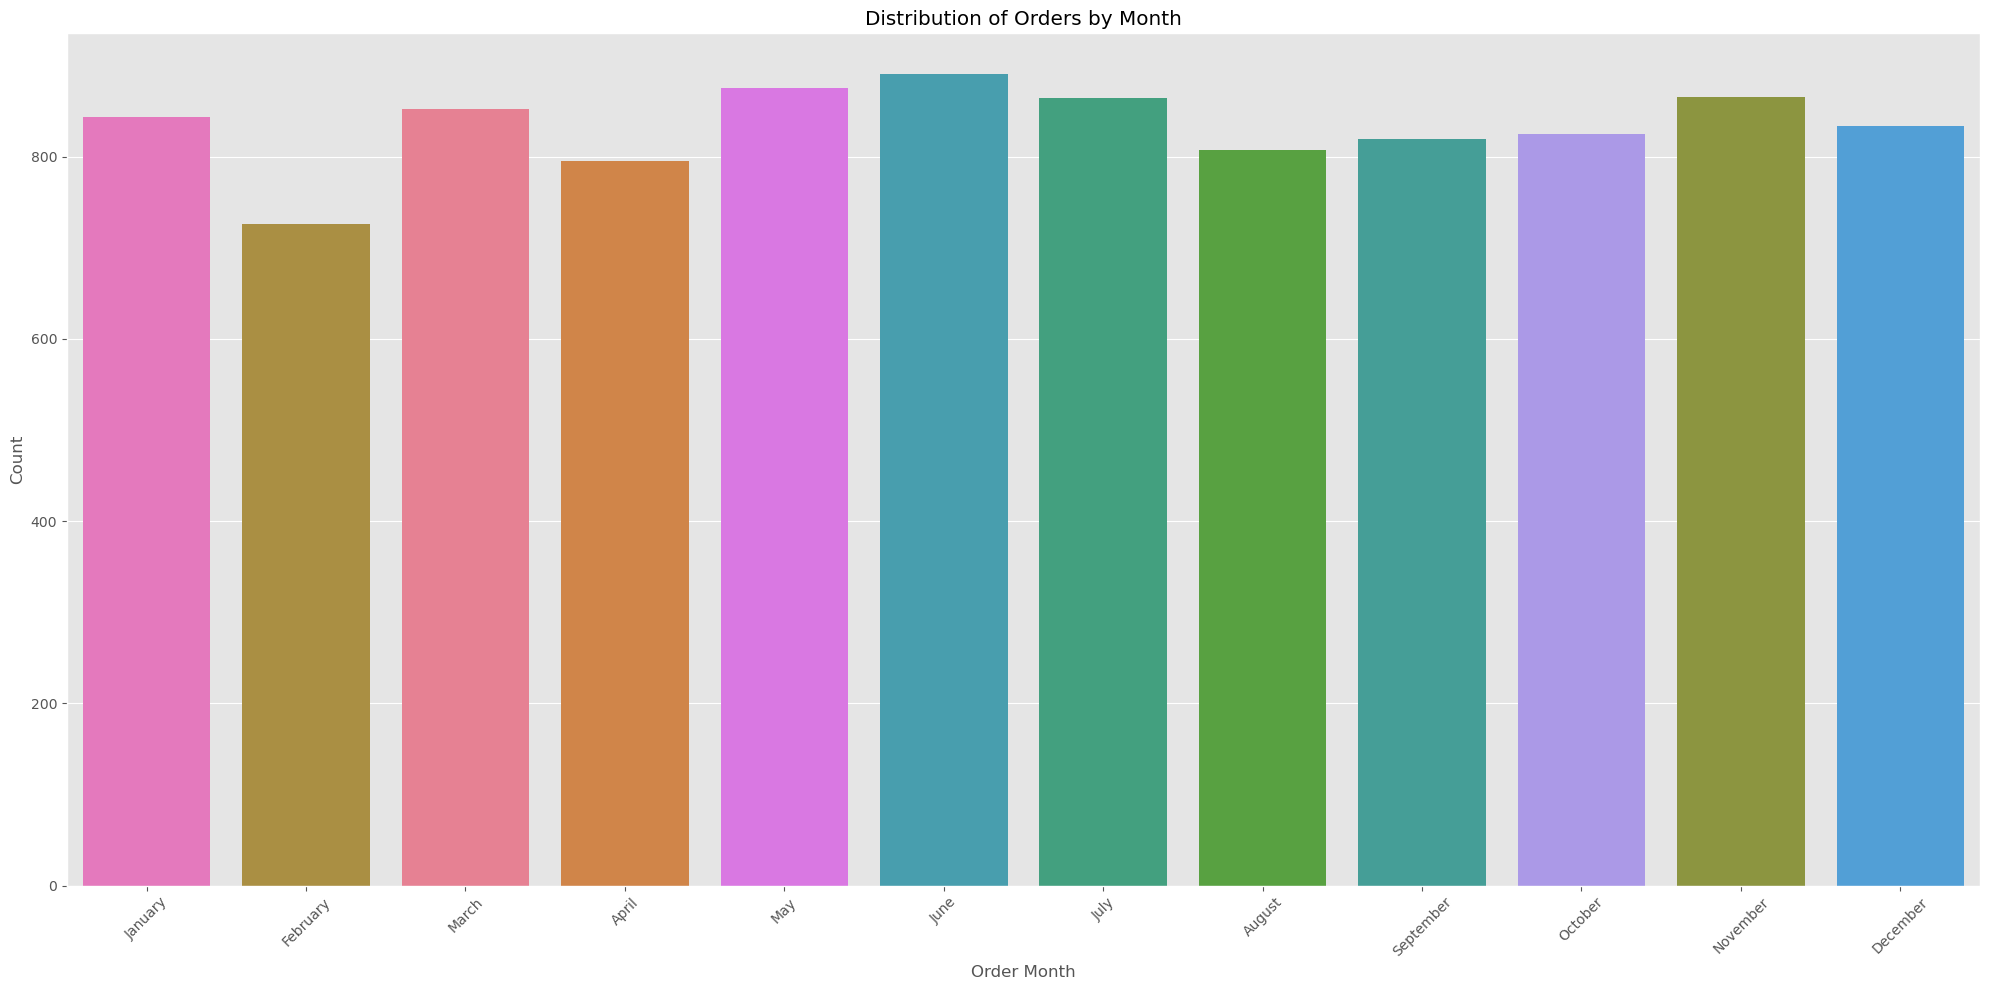

In [8]:
#Univariate analysis - Order Month
plt.style.use('ggplot')

# Count plot for 'Order Month'
plt.figure(figsize=(20,10)) # Adjusted figure size
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(x='Order Month', data=df, order=month_order, hue='Order Month', legend=False)
plt.title('Distribution of Orders by Month')
plt.xlabel('Order Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Plot 5: Count plot of Order Month

Observations:  
The variation between months is relatively moderate.  
June has the highest number of orders and February the lowest.  
There's no seasonal trends.

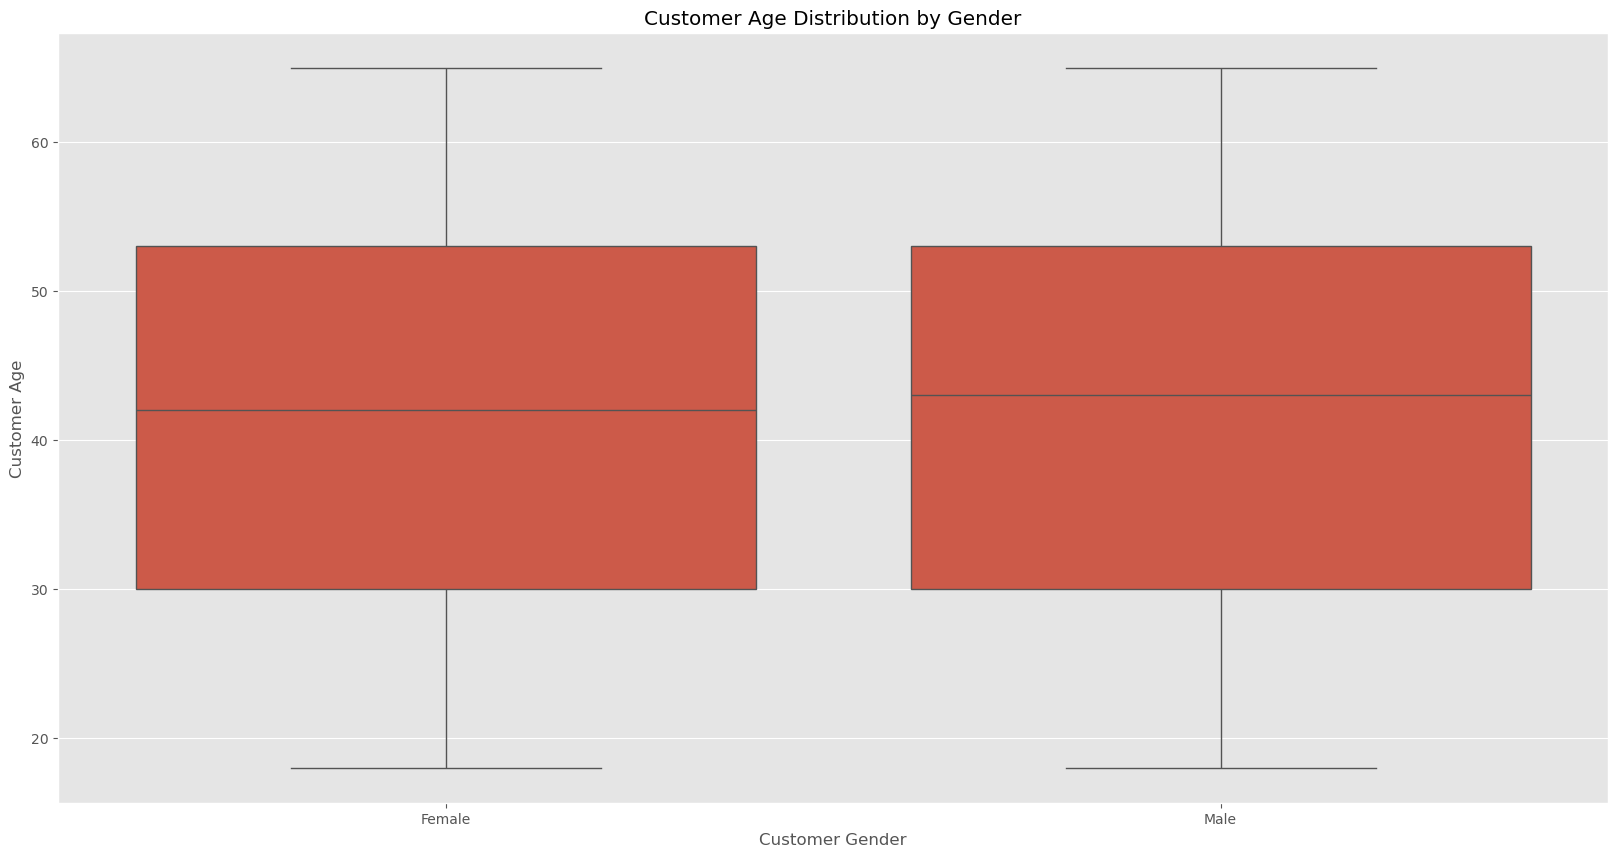

In [9]:
#Bivariate analysis - Customer Age vs Customer Gender
plt.style.use('ggplot')

#customer age vs customer gender
plt.figure(figsize=(20,10)) # Adjusted figure size
sns.boxplot(x='Customer Gender', y='Customer Age', data=df) # Removed redundant legend
plt.title('Customer Age Distribution by Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Customer Age')
plt.show()

Plot 6: Customer Age vs. Customer Gender (Boxplot)

Observations:  
The median age for both male and female customers is very similar, around 42-43 years.  
Both distributions span the full age range from 18 to 65 without any significant outliers.

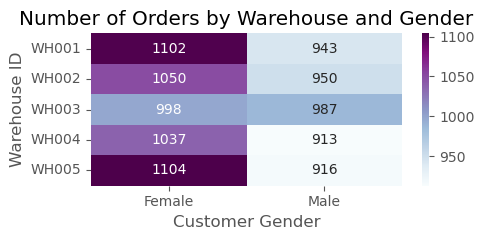

In [10]:
#Multivariate analysis - Average Customer Age by Warehouse and Gender
plt.style.use('ggplot')

#Orders per Warehouse, segmented by Age Group and Gender
pivot_table_age_gender_warehouse = pd.pivot_table(df, values='Order ID', index='Warehouse ID', columns='Customer Gender', aggfunc='count')

plt.figure(figsize=(5,2.5)) 
sns.heatmap(pivot_table_age_gender_warehouse, annot=True, fmt="d", cmap="BuPu") 
plt.title('Number of Orders by Warehouse and Gender') 
plt.xlabel('Customer Gender') 
plt.ylabel('Warehouse ID') 
plt.tight_layout()
plt.show()

##### Plot 8: Heatmap of Number of Orders by Warehouse and Gender

Observations:  
Female customers place more orders than male customers across all warehouses.  
Warehouse WH005 has the highest number of orders for females
Warehouse WH003 has the highest number of orders for males

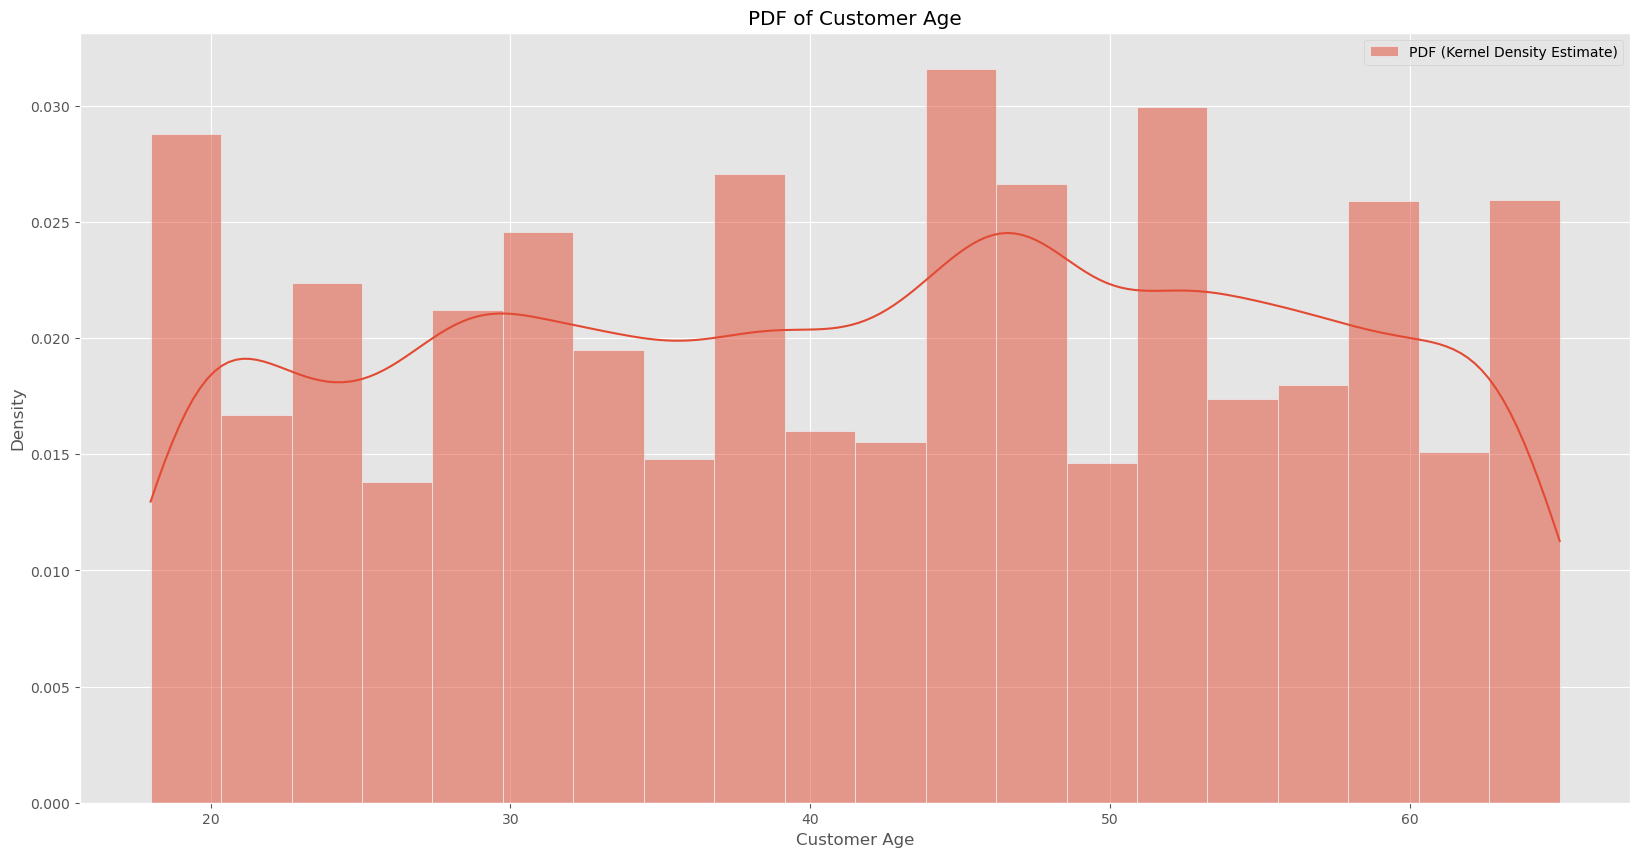

In [11]:
#PDF and CDF - Customer Age (PDF)
plt.style.use('ggplot')

#PDF
plt.figure(figsize=(20,10)) 
sns.histplot(df['Customer Age'], bins=20, stat='density', kde=True, label='PDF (Kernel Density Estimate)')
plt.title('PDF of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Density')
plt.legend()
plt.show()

Plot 9: PDF of Customer Age

Observations:  
The density is stable for customers in between 20s-40s and increases between 40s-60s, then dropping off after 60s

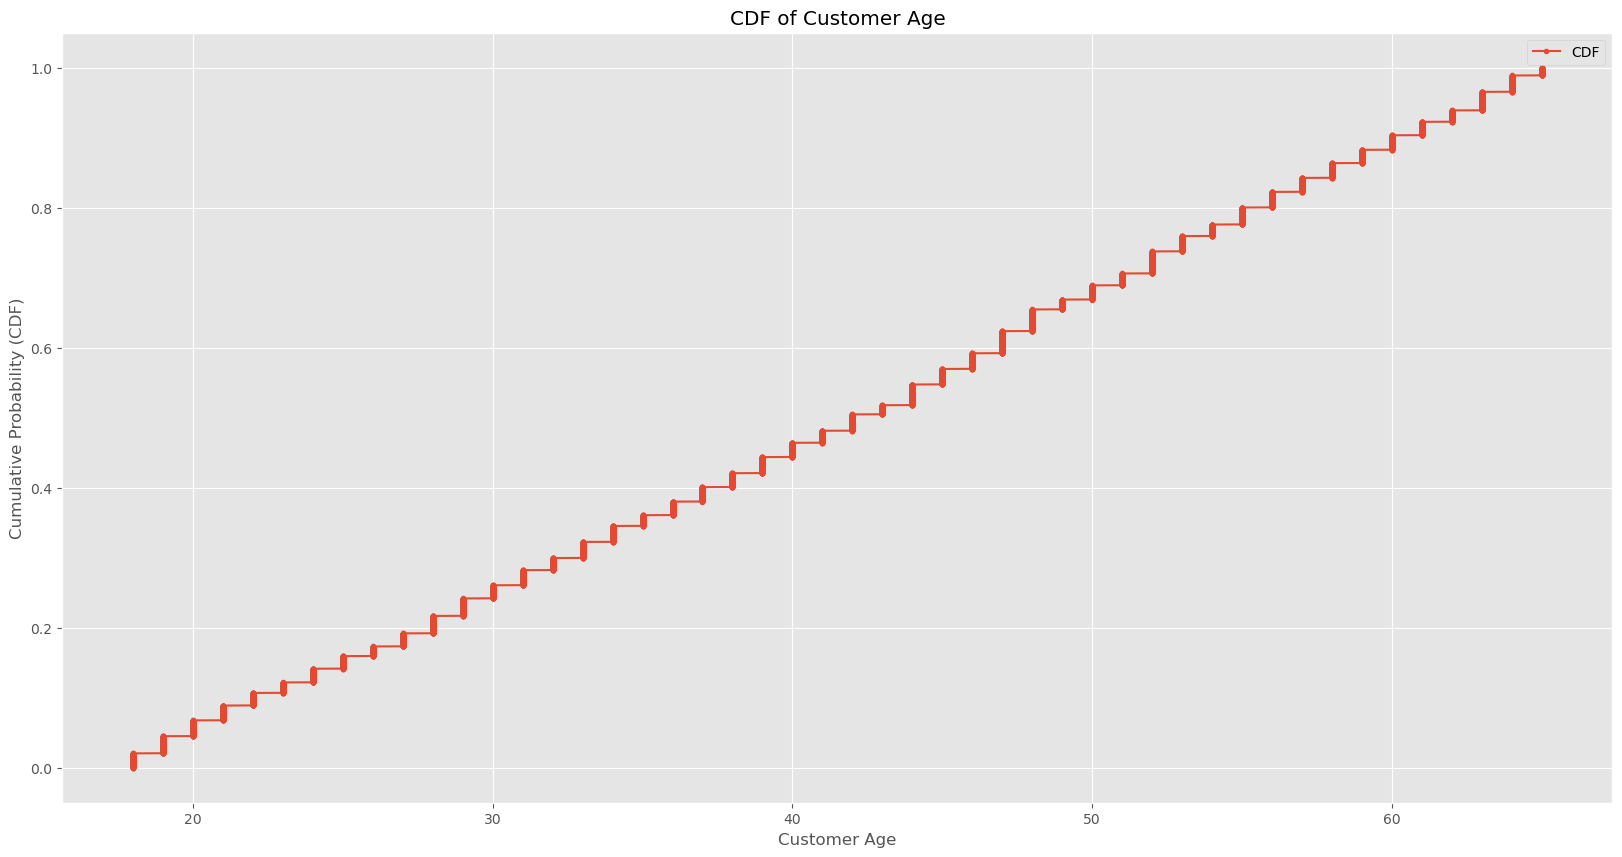

In [12]:
plt.style.use('ggplot')

#sort data for CD
age_sorted = np.sort(df['Customer Age'])
cdf_values = np.arange(1, len(age_sorted) + 1) / len(age_sorted)


plt.figure(figsize=(20,10)) 
plt.plot(age_sorted, cdf_values, marker='.', linestyle='-', label='CDF')
plt.title('CDF of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Cumulative Probability (CDF)')
plt.grid(True)
plt.legend()
plt.show()

Plot 10: CDF of Customer Age

Observations:  
Approximately 25% of customers are below the age of 30.  
The median customer age (50th percentile) is around 42-43 years.  
About 75% of customers are younger than 53 years old.

To sum everything up,  
-More orders are from females than from males.  
-Most orders are from the age group 40-50.  
-WH001 receives the most orders, but only by a slight margin.  
-Most Orders are placed on Sunday ,but only by a slight margin.  
-Most Orders are placed in June, but only by a slight margin.  
-Median Age for Male and Female customers is 42-43.  
-Warehouse 5 receives the most orders from Female Customers, and WH003 receives the most orders from Male customers.  


---Now EDA on order_line.csv---

In [13]:
#loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading data
df = pd.read_csv("order_line.csv")

#basic data information
print("\n--- First 5 Rows of the DataFrame ---")
print(df.head())

print("\n--- DataFrame Information ---")
df.info()

print("\n--- Descriptive Statistics (Including Object Types) ---")
print(df.describe(include='all'))


--- First 5 Rows of the DataFrame ---
   Order ID   Product ID   SKU ID                  Category  Quantity  \
0      2664  Product_099  SKU_053    Beauty & Personal Care         2   
1      2664  Product_138  SKU_087              Toys & Games         4   
2      2664  Product_190  SKU_831  Groceries & Gourmet Food         4   
3      5028  Product_156  SKU_524    Beauty & Personal Care         3   
4      9143  Product_126  SKU_651    Beauty & Personal Care         2   

   Price per Unit  
0           75.67  
1          636.36  
2           82.44  
3           57.16  
4           35.05  

--- DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24885 entries, 0 to 24884
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        24885 non-null  int64  
 1   Product ID      24885 non-null  object 
 2   SKU ID          24885 non-null  object 
 3   Category        24885 non-null  o

In [14]:
#data cleaning

#check for duplicate rows and remove if any.
print(f"Number of duplicate rows before removal: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

#convert 'Category' to 'category' dtype for efficiency, as it has limited unique values (10).
#'Product ID' and 'SKU ID' have many unique values, so keep them as 'object'.
df['Category'] = df['Category'].astype('category')

#verify data types after cleaning
print("\n--- Data Types After Cleaning ---")
print(df.dtypes)

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0

--- Data Types After Cleaning ---
Order ID             int64
Product ID          object
SKU ID              object
Category          category
Quantity             int64
Price per Unit     float64
dtype: object


In [15]:
#feature engineering

#create 'Total Price' column by multiplying 'Quantity' and 'Price per Unit'.
#this feature represents the total revenue for each line item in an order.
#it can be useful for analyzing revenue contributions by product, category, or order.
df['Total Price'] = df['Quantity'] * df['Price per Unit']

print("--- DataFrame with new 'Total Price' feature (first 5 rows) ---")
print(df.head())

print("\n--- Descriptive Statistics for 'Total Price' ---")
print(df['Total Price'].describe())

--- DataFrame with new 'Total Price' feature (first 5 rows) ---
   Order ID   Product ID   SKU ID                  Category  Quantity  \
0      2664  Product_099  SKU_053    Beauty & Personal Care         2   
1      2664  Product_138  SKU_087              Toys & Games         4   
2      2664  Product_190  SKU_831  Groceries & Gourmet Food         4   
3      5028  Product_156  SKU_524    Beauty & Personal Care         3   
4      9143  Product_126  SKU_651    Beauty & Personal Care         2   

   Price per Unit  Total Price  
0           75.67       151.34  
1          636.36      2545.44  
2           82.44       329.76  
3           57.16       171.48  
4           35.05        70.10  

--- Descriptive Statistics for 'Total Price' ---
count    24885.000000
mean      1411.986825
std       1188.548432
min         20.070000
25%        430.550000
50%       1024.920000
75%       2121.090000
max       4999.300000
Name: Total Price, dtype: float64


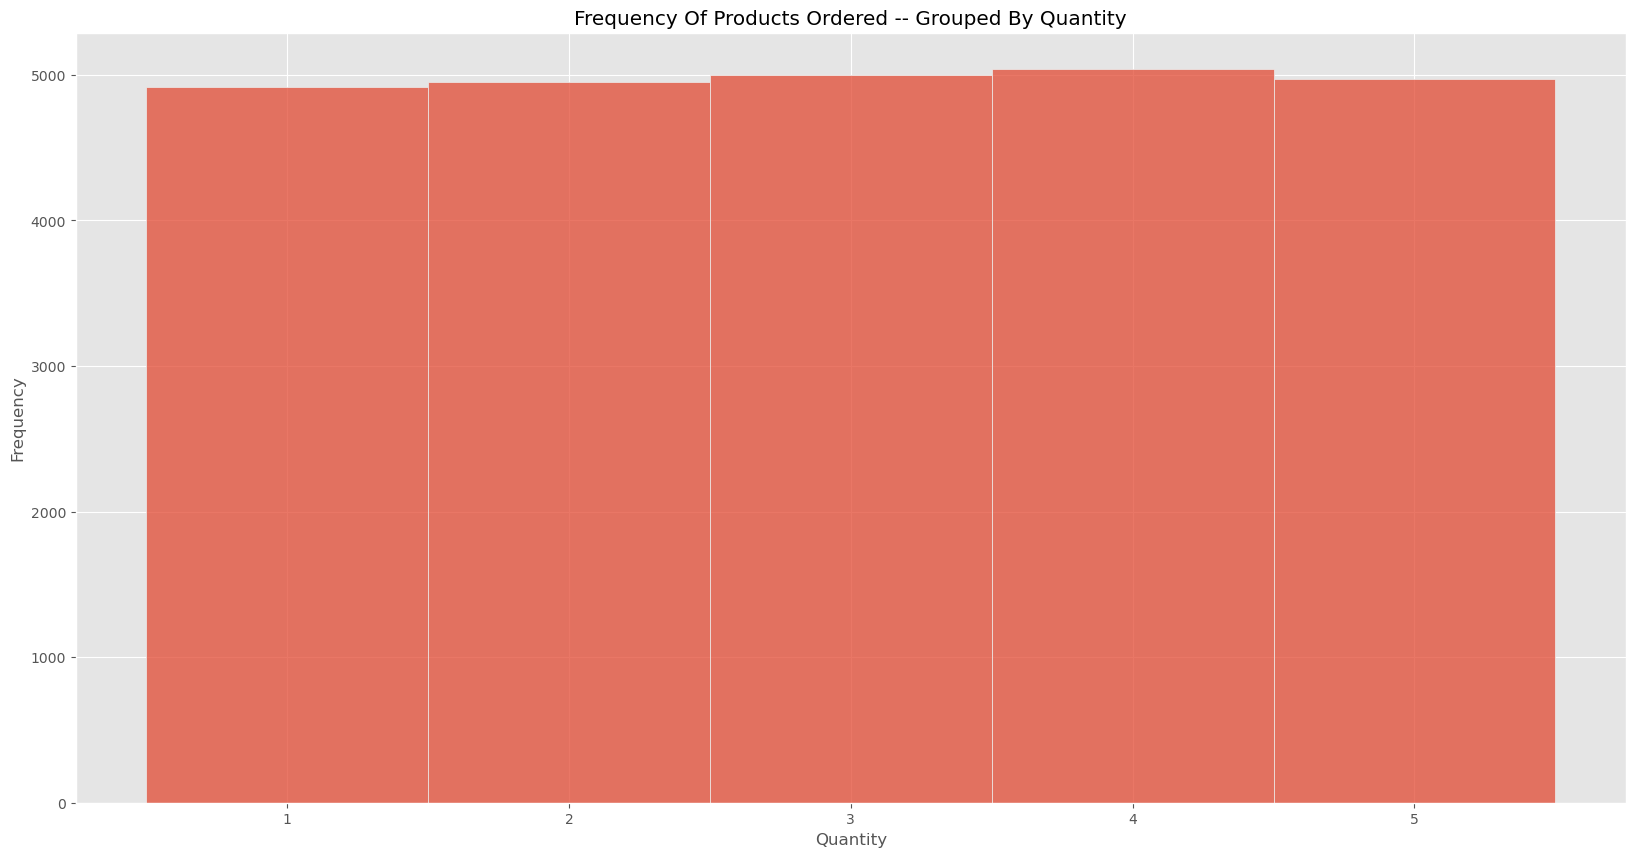

In [16]:
#univariate analysis
#numerical features

#histogram for 'Quantity'
plt.figure(figsize=(20,10))
sns.histplot(df['Quantity'],kde=False, discrete=True)
plt.title('Frequency Of Products Ordered -- Grouped By Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

Univariate Analysis: Frequency of Product Ordered - Grouped By Quantity 

Observations:  
The frequency remains almost consistent throughout the quantity ordered; no outliers exist.

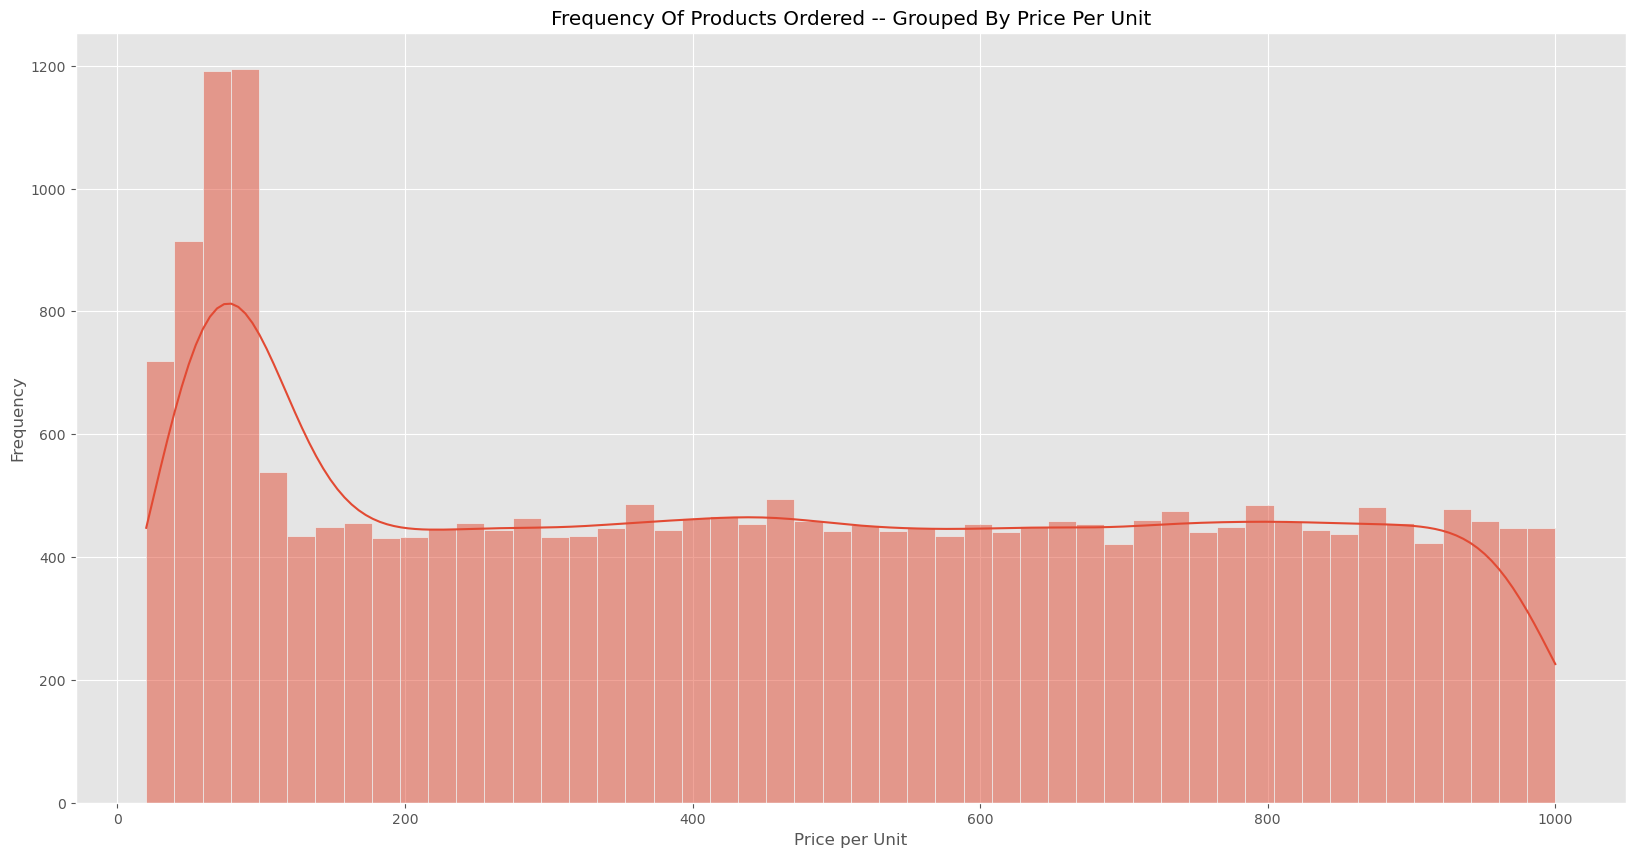

In [17]:
#histogram for 'Price per Unit'
plt.figure(figsize=(20,10))
sns.histplot(df['Price per Unit'], bins=50, kde=True)
plt.title('Frequency Of Products Ordered -- Grouped By Price Per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.show()

Univariate Analysis: 'Frequency Of Products Ordered -Grouped by Price Per Unit'

Observations:  
The frequency is high between 0-200 ie the cheaper products are being ordered more.  
The frequency remains consistent between 200-900 and drops off after 900.  
ie the more expensive products are being ordered less 

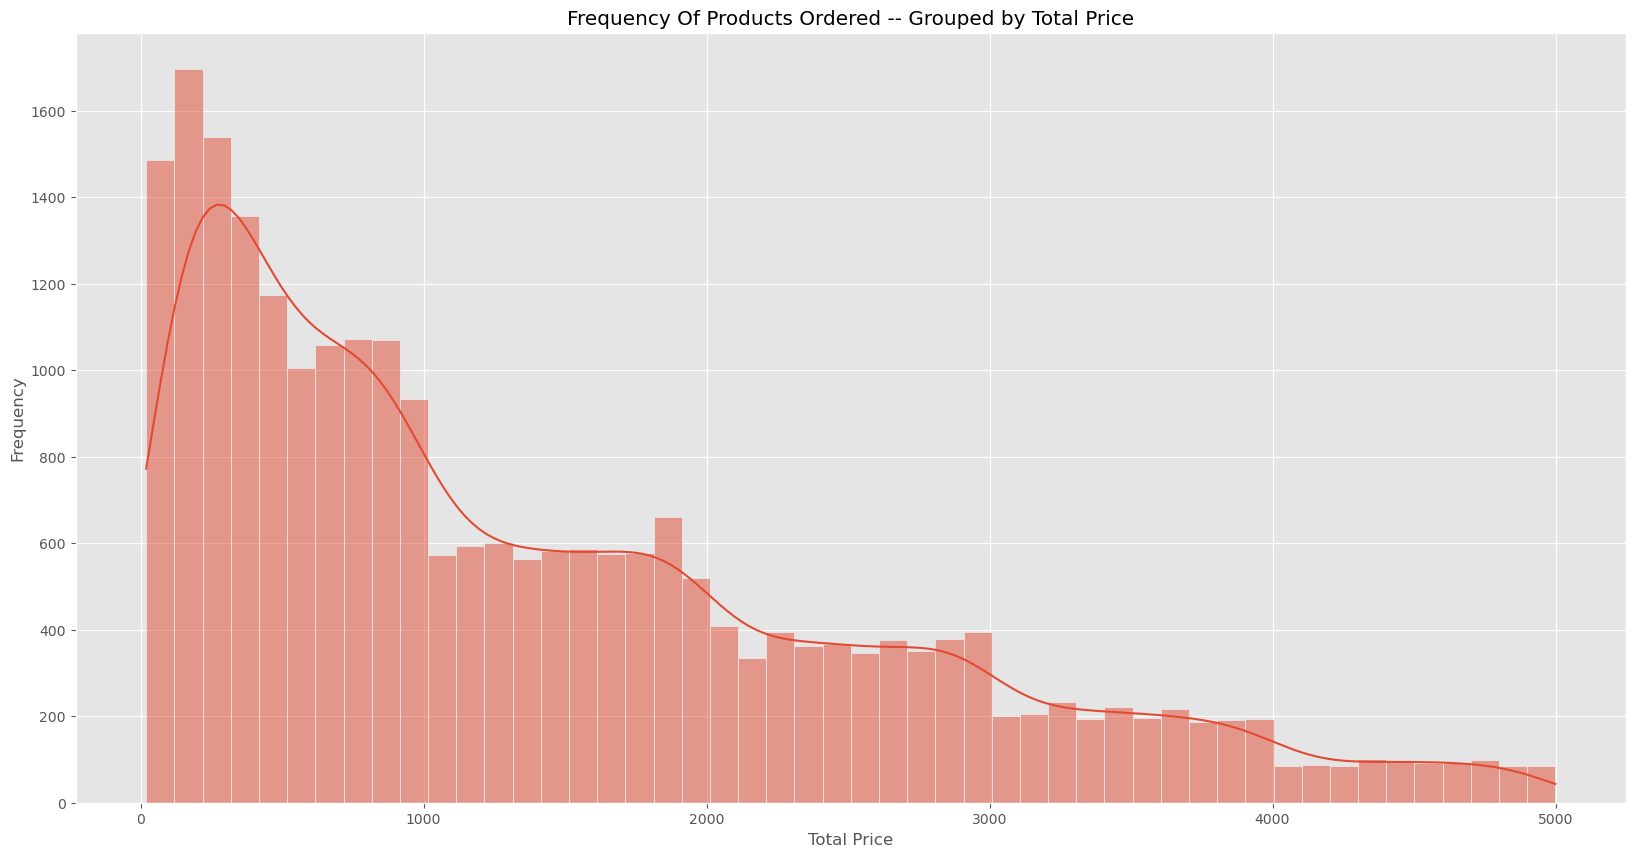

In [18]:
#histogram for 'Total Price'
plt.figure(figsize=(20,10))
sns.histplot(df['Total Price'], bins=50, kde=True)
plt.title('Frequency Of Products Ordered -- Grouped by Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

Univariate Analysis: Total Price (Histogram)

Observations:  
Most order line totals are concentrated in the lower range (roughly below 2000).  
This difference in concentration is expected, as higher quantity and/or higher unit price items will result in higher total prices.

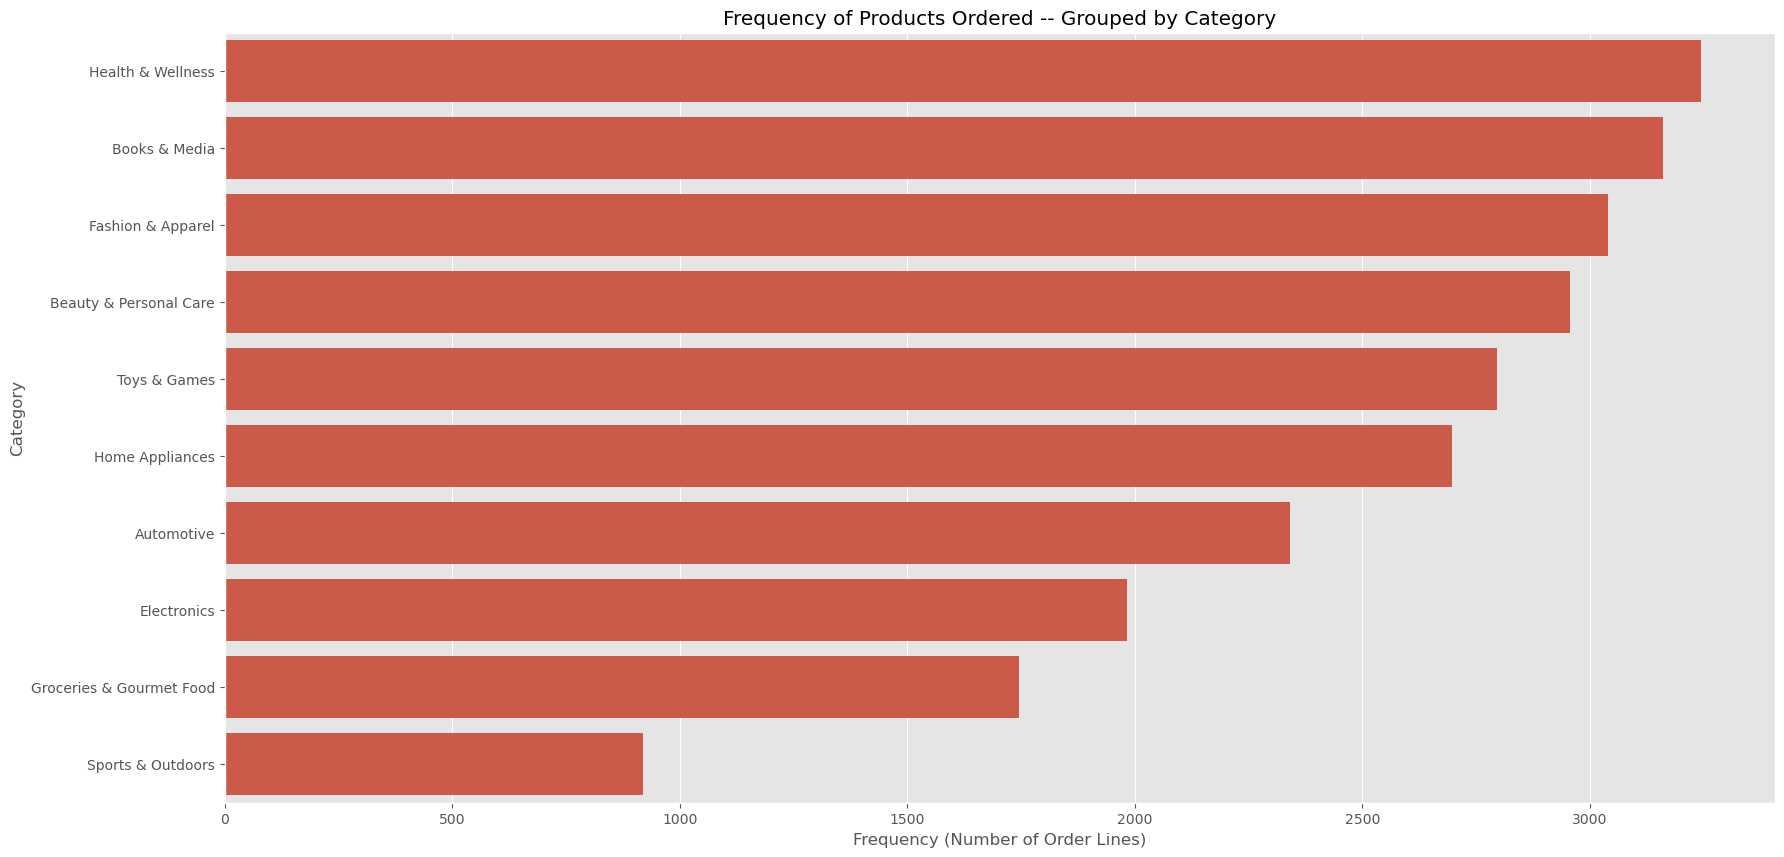

In [19]:
#categorical features

#bar chart for 'Category'
plt.figure(figsize=(20,10)) # Adjusted figure size for better readability of y-axis labels
category_order = df['Category'].value_counts().index # Order by frequency
sns.countplot(y=df['Category'], order=category_order)
plt.title('Frequency of Products Ordered -- Grouped by Category')
plt.xlabel('Frequency (Number of Order Lines)')
plt.ylabel('Category')
plt.show()

Univariate Analysis: Category

Observations:  
"Health & Wellness" is the most frequent category, followed closely by "Books and Media", "Fashion and Apparel", and "Beauty & Personal Care".  
"Toys and Games" and "Home Appliances" also have a significant number of order.  
This distribution gives an idea of which categories are most popular or have the highest number of transactions in this dataset. 

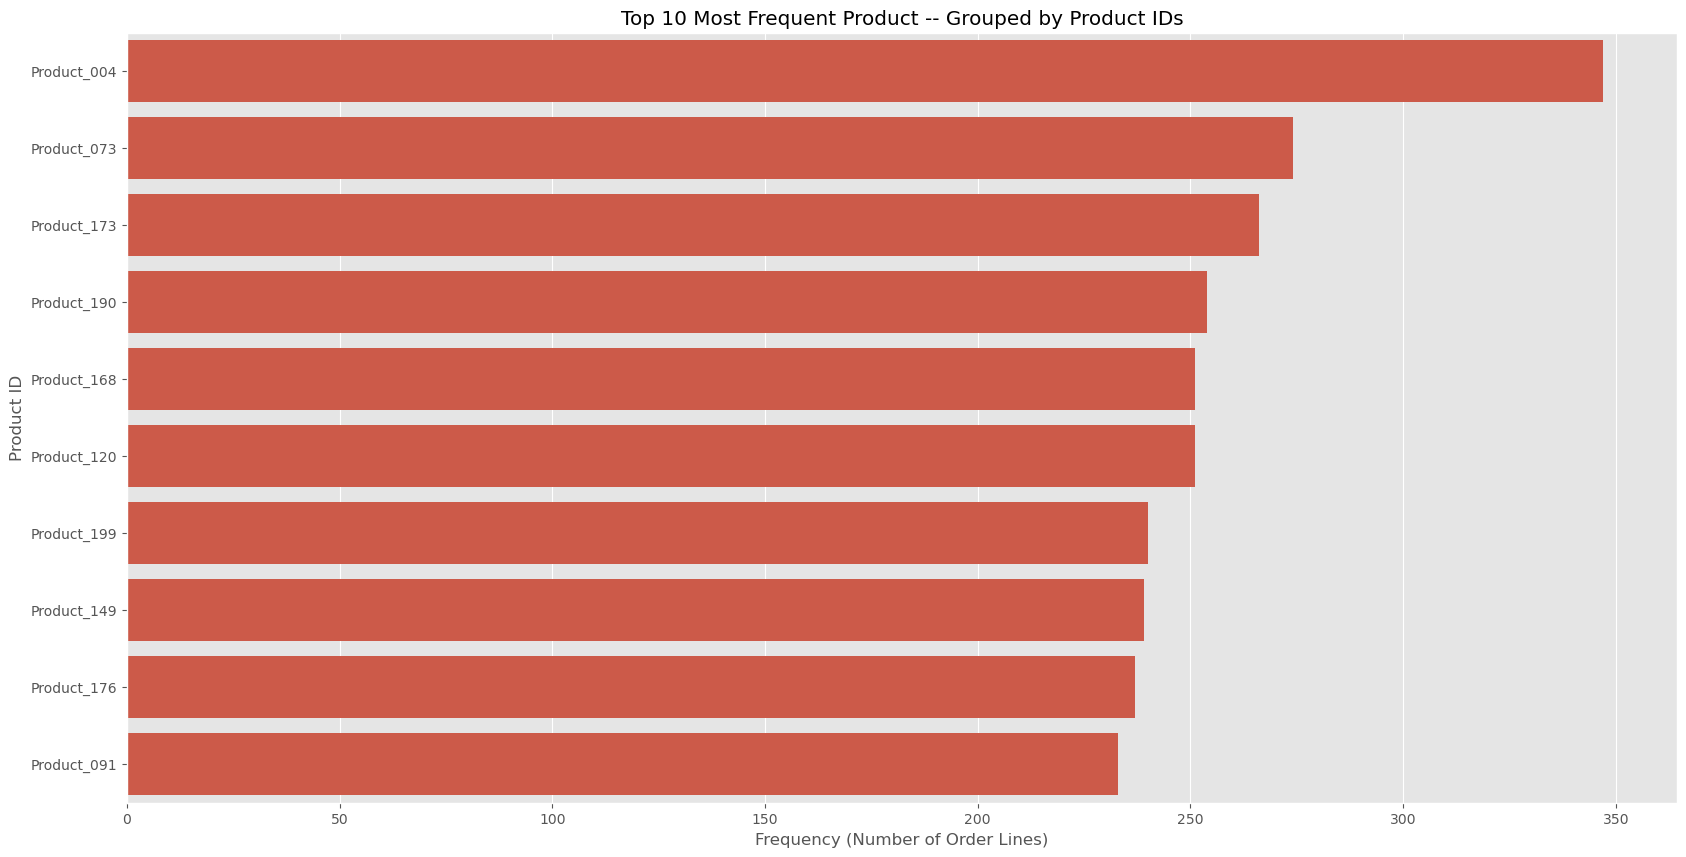

In [20]:
# Bar chart for top 10 'Product ID'
plt.figure(figsize=(20,10))
top_n_products = 10
product_order = df['Product ID'].value_counts().nlargest(top_n_products).index
sns.countplot(y=df[df['Product ID'].isin(product_order)]['Product ID'], order=product_order)
plt.title(f'Top {top_n_products} Most Frequent Product -- Grouped by Product IDs')
plt.xlabel('Frequency (Number of Order Lines)')
plt.ylabel('Product ID')
plt.show()

Univariate Analysis: Top 10 Product IDs

Observations:  
This bar chart shows the frequency of the top 10 most common 'Product ID's in the order lines.  
'Product_004' is the most frequently occurring product, appearing in over 300 order lines.

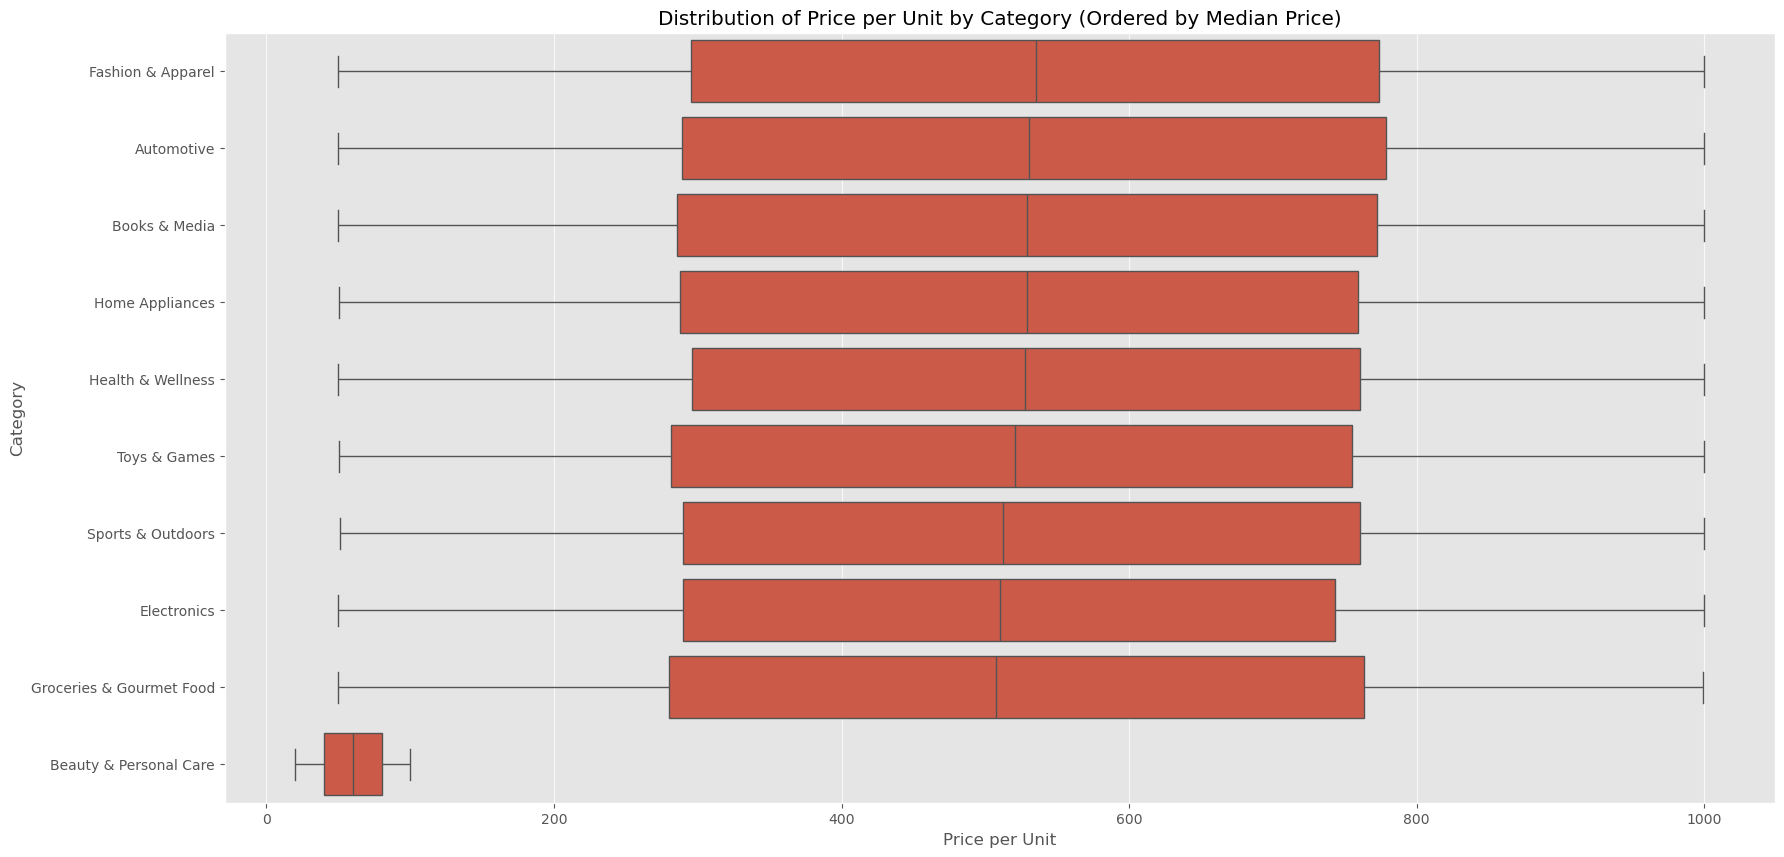

In [21]:
#bivariate
#categorical vs numerical:'category' vs 'price per unit'
plt.figure(figsize=(20,10))
#order categories by their median 'Price per Unit' for clearer comparison
median_price_order = df.groupby('Category', observed=True)['Price per Unit'].median().sort_values(ascending=False).index
sns.boxplot(y='Category', x='Price per Unit', data=df, order=median_price_order)
plt.title('Distribution of Price per Unit by Category (Ordered by Median Price)')
plt.xlabel('Price per Unit')
plt.ylabel('Category')
plt.grid(axis='x', alpha=0.75)
plt.show()

Bivariate Analysis: Distribution of Price per Unit by Category

Observations:  
'Fashion & Apparel' clearly has the highest median.  
'Automotive' and 'Books & Media' also have relatively high median.  
"Beauty & Personal Care" has the lowest median.


-----Multivariate Analysis-----


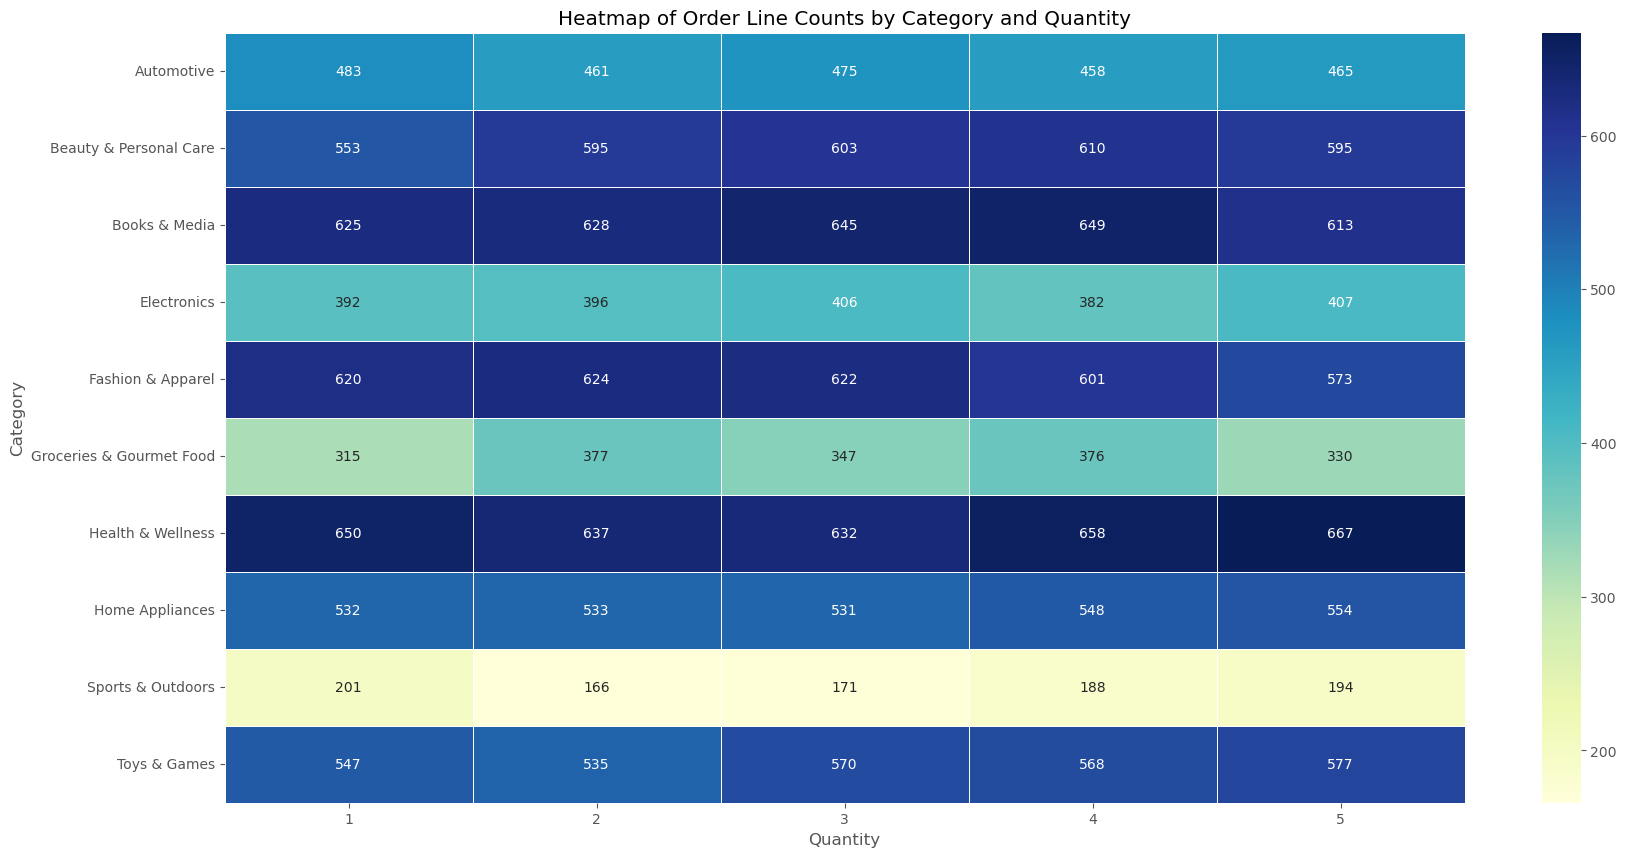

In [22]:
print("\n-----Multivariate Analysis-----")

#Heatmap of Order Line Counts by Category and Quantity
pivot_table_counts = pd.pivot_table(df, index='Category', columns='Quantity', aggfunc='size', observed=True)
plt.figure(figsize=(20,10))
sns.heatmap(pivot_table_counts, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Order Line Counts by Category and Quantity')
plt.ylabel('Category')
plt.xlabel('Quantity')
plt.show()

Multivariate Analysis: Heatmap of Order Line Counts by Category and Quantity

Observations:  
'Health & Wellness' and 'Books & Media' have high density across all quantities
'Sports & Outdoors' has low density across all quantities


-----PDF and CDF Analysis for Numerical Features-----


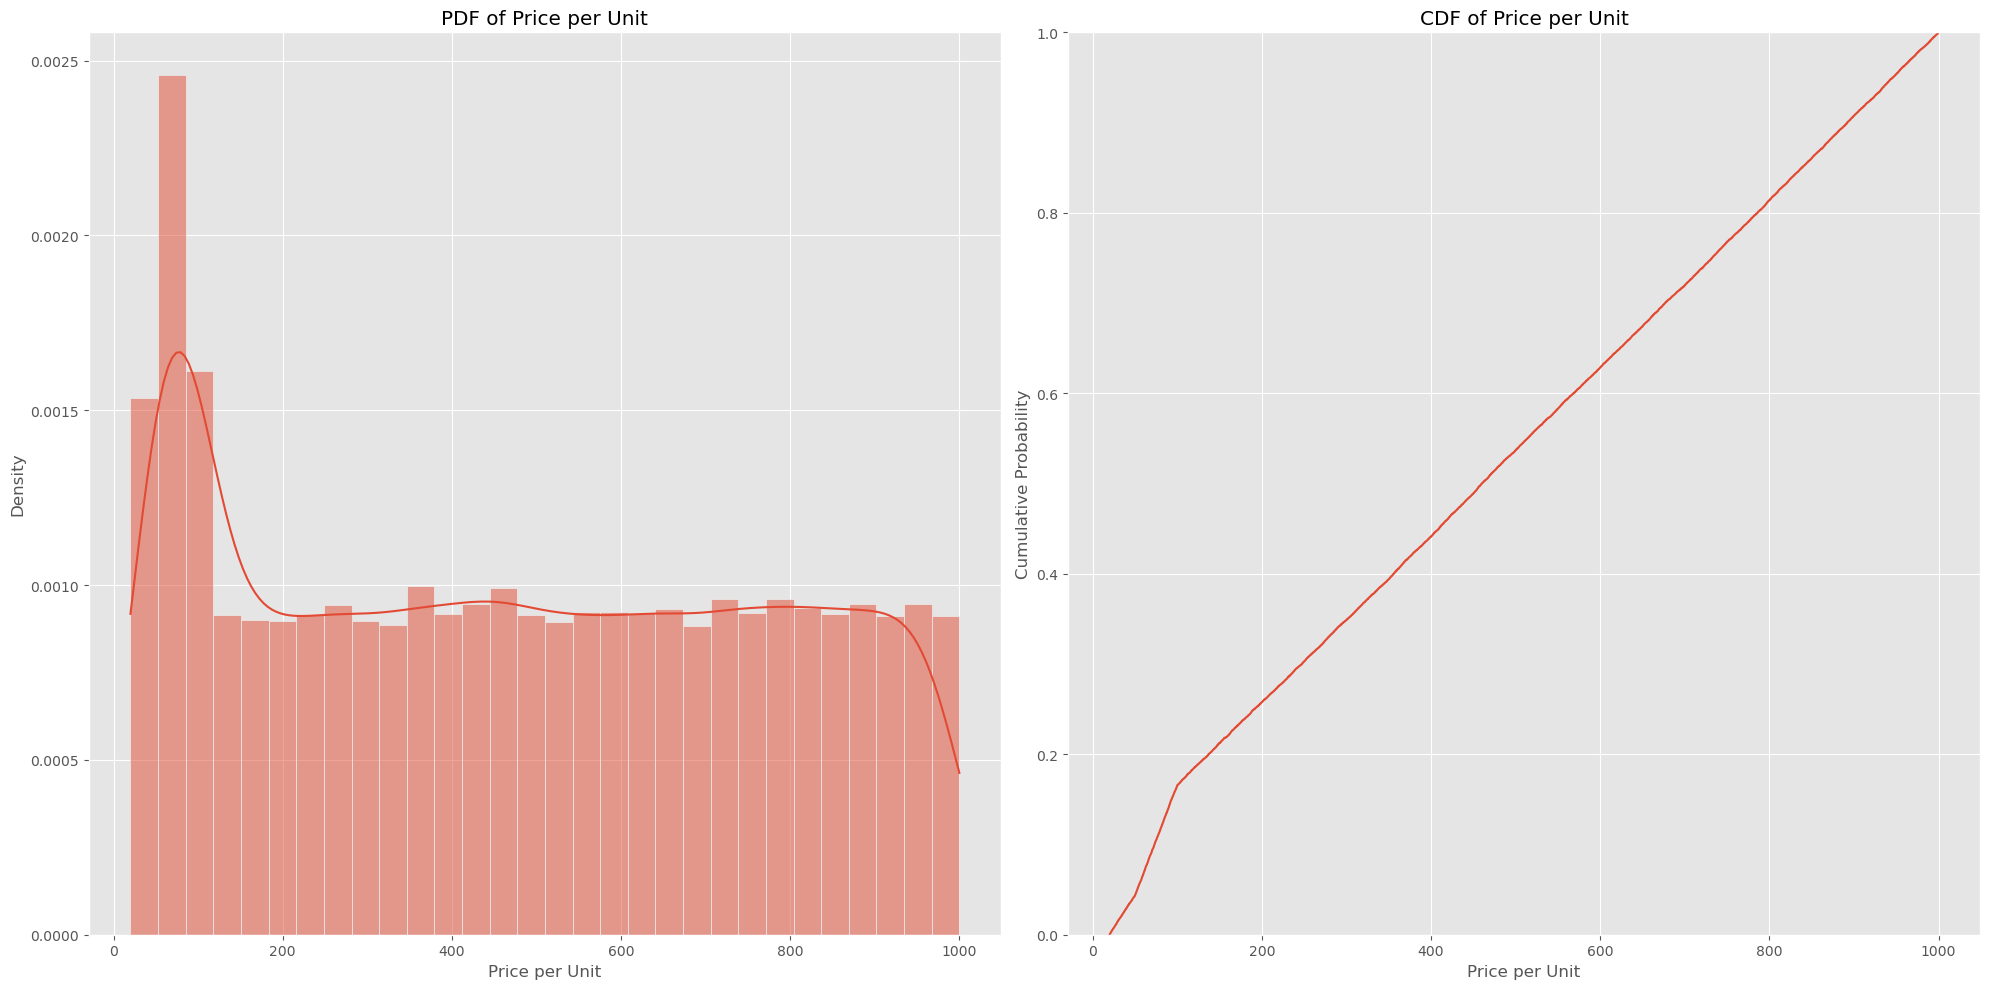

In [23]:
print("\n-----PDF and CDF Analysis for Numerical Features-----")
numerical_features_for_pdf_cdf = ['Price per Unit']

for feature in numerical_features_for_pdf_cdf:
    plt.figure(figsize=(20,10))

    #PDF
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, stat="density", common_norm=False, bins=30)
    plt.title(f'PDF of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

    #CDF
    plt.subplot(1, 2, 2)
    sns.ecdfplot(data=df, x=feature)
    plt.title(f'CDF of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Cumulative Probability')

    plt.tight_layout()
    plt.show()

The PDF and CDF of Price Per Unit

Observation:
The probability density has an initial surge in the range 0-100 and later remains consistent from 200-1000  
25% of PPU is at 200 or below  
50% of PPU is at 425 or below  
75% of PPU is at 700 or below


-----PDF and CDF Analysis for Numerical Features-----


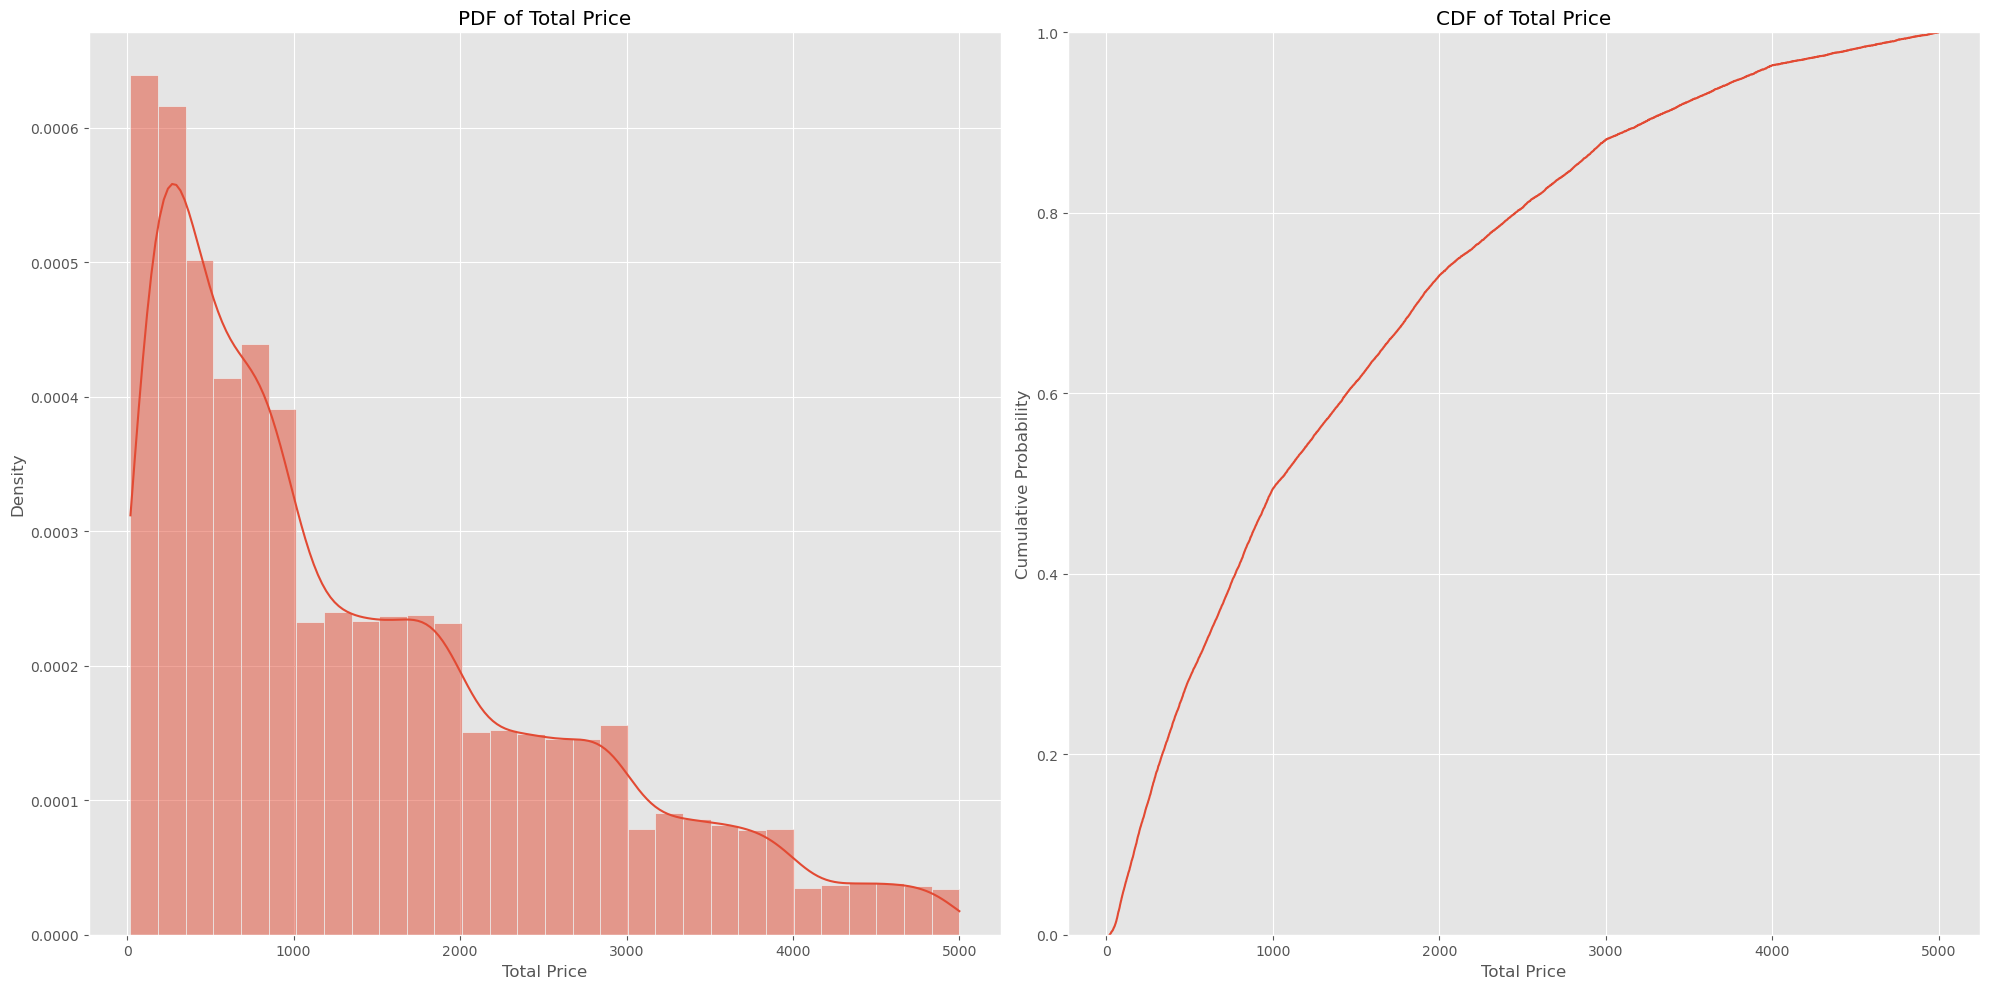

In [24]:
print("\n-----PDF and CDF Analysis for Numerical Features-----")
numerical_features_for_pdf_cdf = ['Total Price']

for feature in numerical_features_for_pdf_cdf:
    plt.figure(figsize=(20,10))

    #PDF
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, stat="density", common_norm=False, bins=30)
    plt.title(f'PDF of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

    #CDF
    plt.subplot(1, 2, 2)
    sns.ecdfplot(data=df, x=feature)
    plt.title(f'CDF of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Cumulative Probability')

    plt.tight_layout()
    plt.show()

The PDF and CDF of Total Price

Observation:
The Probability density has an initial surge in the range 0-500 and later drops gradually with the intervals of 1000  
25% of Total Price is below 250  
50% of Total Price is below 1000  
75% of Total Price is below 2000  

To sum everything up,  
-The amount of products ordered when grouped by.  
1)quanitity, is consistent across all categories.  
2)price per unit, is highest in the range 0-200 and it remians consistent after that.   
3)total price, is highest in the range 0-1000, and it decreases gradually after that.   
4)Category, is highest for 'health & wellness' and 'books & media'.  
5)Product ID, is highest across 'Product_004' and 'Product_073.  
-The category with the highest median price per unit is 'Fashion' and 'Automotive'.  
-'health & wellness' and 'books & media' has high number of orders across all number of quantities.  


---now order value predictor using regression---